In [8]:
import pandas as pd
#import plotly
#import dash
#!cd CS_Projects/Dashboard_1223/

In [9]:
df = pd.read_csv('data/grades.csv')
df.head()

,ID,Participation,Reading Assignment 2,Reading Assignment 3,Reading Assignment 4,Reading Assignment 5,Tracing Table Practice,Reading Assignment 6,Reading Assignment 7,Reading Assignment 8,...,Letter Grade,Reweight (based on reduced weight on MT1 and increased weight on MT2),Letter Grade.1,Reweight 2,Letter Grade.2,Final Grade,Letter Grade.3,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,1,3.00,10.00,10.0,10.00,10.00,5.0,10.00,10.00,10.0,...,A,100.000000,A,100.000000,A,100.000000,A,NaN,NaN,NaN
1,2,2.74,9.81,10.0,9.55,9.03,5.0,9.04,9.49,10.0,...,D,54.860492,E,55.060492,E,63.460492,D,NaN,NaN,NaN
2,3,2.47,9.43,10.0,9.36,8.83,4.0,8.75,10.00,10.0,...,E,42.276027,E,43.376027,E,49.276027,E,NaN,NaN,NaN
3,4,2.47,9.43,10.0,9.94,10.00,4.0,9.42,10.00,10.0,...,D,51.814600,E,51.714600,E,60.214600,D,NaN,NaN,NaN
4,5,2.91,10.00,10.0,10.00,10.00,5.0,10.00,10.00,10.0,...,E,47.660000,E,47.260000,E,53.560000,E,NaN,Grade Breakdown,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1175f48d0>]],
      dtype=object)

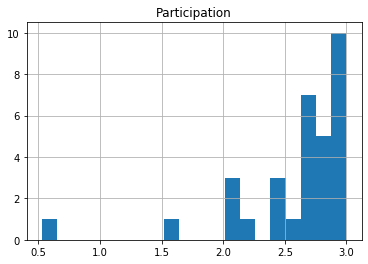

In [10]:
df.hist(column='Participation', bins=20)

count    32.000000
mean      2.602187
std       0.504584
min       0.530000
25%       2.492500
50%       2.740000
75%       2.910000
max       3.000000
Name: Participation, dtype: float64


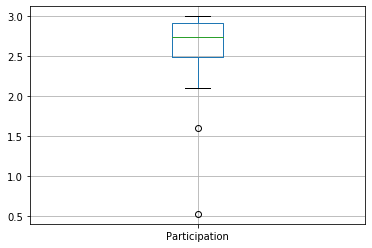

In [11]:
print(df['Participation'].describe())
df.boxplot(column='Participation')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117799e10>]],
      dtype=object)

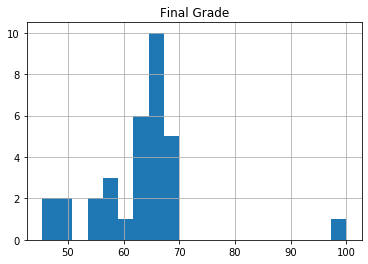

In [12]:
df.hist(column='Final Grade', bins=20)

count     32.000000
mean      63.002546
std        9.542483
min       45.340722
25%       58.818025
50%       64.131717
75%       67.003073
max      100.000000
Name: Final Grade, dtype: float64


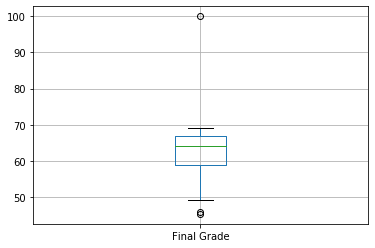

In [13]:
print(df['Final Grade'].describe())
df.boxplot(column='Final Grade')

In [7]:
#filter_col_reading = [col for col in df if col.startswith('Reading')]
filter_col_reading = [col for col in df if col.startswith('Reading')]
df[filter_col_reading].describe()
#df['Reading Total'] = filter_col_reading.sum()
#df['Reading Total'] = df.loc[:, df.columns.str.startswith("Reading")].sum()
#df.head()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [ ]:

col = df.loc[: , "Reading Assignment 2":"Reading Assignment 10"]
df['reading_mean'] = col.mean(axis = 1)
df['reading_mean'].describe()
#df.hist(column=filter_col_reading, bins=20)

In [ ]:
df = df.rename({'Reweight (based on reduced weight on MT1 and increased weight on MT2)': 'Reweight'}, axis=1)
df.hist(column='Reweight', bins=20)

/Users/smera/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


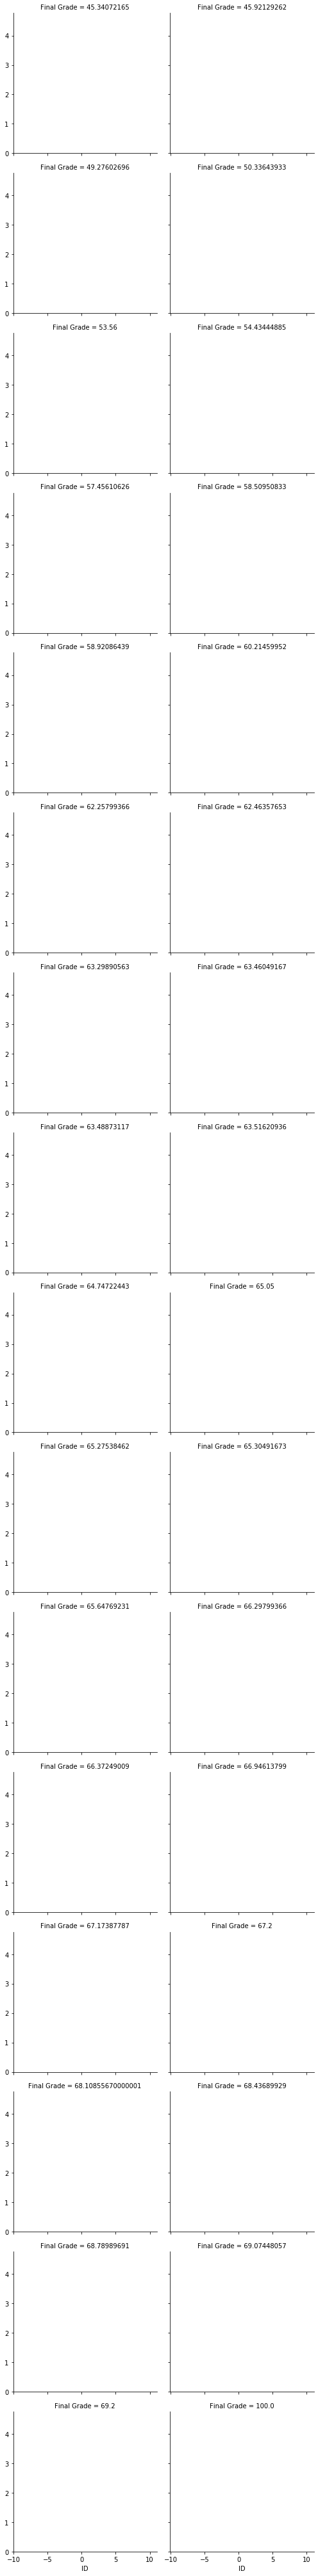

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


def distplot(x, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    sns.distplot(data[x], ax=ax, **kwargs)

g = sns.FacetGrid(df, col="Final Grade", col_wrap=2, size=3.5)
g = g.map_dataframe(distplot, "ID")

In [17]:
df = df.stack().reset_index(level=1, name="ID")
df.head()

,level_1,ID
0,level_1,ID
0,ID,1
0,level_1,Participation
0,ID,3
0,level_1,Reading Assignment 2


In [ ]:
# just to see if people with high project grades did better overall
eighty_perc = df['Project Totals'].quantile(q=0.80)
high_projects = df.loc[df['Project Totals'] >= eighty_perc]
high_projects['Final Grade'].mean()

In [ ]:
# visited = [] 
  
# # loop for counting the unique 
# # values in height 
# for i in range(0, len(df['height'])): 
    
#     if df['height'][i] not in visited:  
        
#         visited.append(df['height'][i]) 
          
#         cnt += 1

m = pd.DataFrame(df.groupby(['Letter Grade'])['Letter Grade'].value_counts())
m.rename(columns={ m.columns[0]: "values" }, inplace = True)
m

# yval = df['Letter Grade'].value_counts()
ax = df.plot.bar(x='Letter Grade', y=m['values'], rot=0)

In [ ]:
# just to see if people with high participation grades did better overall
eighty_perc_part = df['Participation'].quantile(q=0.80)
high_participation = df.loc[df['Participation'] >= 2.5]
high_participation['Final Grade'].mean()

In [ ]:
df[df['Letter Grade'] == 'D']

In [ ]:
# import sys
# !{sys.executable} -m pip install plotly
#import plotly.express as px
#fig = px.scatter(df[df['Letter Grade'] == 'D'], x='Final Grade', y='ID', size='Final Grade', color='Midterm Totals')
#fig.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
sns.kdeplot(data=df, x="Participation", ax=ax1)
ax1.set_xlim((df["Participation"].min(), df["Participation"].max()))
ax2 = ax1.twinx()
sns.histplot(data=df, x="Participation", discrete=True, ax=ax2)

In [ ]:
import numpy as np
import scipy.stats as sts


x = np.linspace(int(df['Participation'].min()), int(df['Participation'].max()))

kde = sts.gaussian_kde(df['Participation'])
plt.plot(x, kde.pdf(x), c='Participation', lw=8, label='KDE')

In [ ]:
from sklearn.neighbors.kde import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(df['Participation'])
x = np.linspace(int(df['Participation'].min()), int(df['Participation'].max()))

density = np.exp(kde.score_samples(x))

plt.plot(x, density)
plt.show()